In [ ]:
import pandas as pd

# Load the dataset

data = pd.read_excel('/content/omKolthoum.xlsx')

# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OppID                            114 non-null    object 
 1   AccountID                        114 non-null    object 
 2   DRX_careline                     111 non-null    object 
 3   SeriesSalesPrice                 114 non-null    float64
 4   Series_sales_priceDirectedParts  114 non-null    int64  
 5   Cost_Series__c                   114 non-null    int64  
 6   Copper_Sales                     114 non-null    int64  
 7   Aluminium_Sales                  114 non-null    int64  
 8   Potentials                       114 non-null    int64  
 9   Lifetimes                        114 non-null    int64  
 10  Sales_allocation                 114 non-null    int64  
 11  Direct_material_costs            114 non-null    int64  
 12  Material_CU           

,OppID,AccountID,DRX_careline,SeriesSalesPrice,Series_sales_priceDirectedParts,Cost_Series__c,Copper_Sales,Aluminium_Sales,Potentials,Lifetimes,...,Material_CU,Material_AL,Material_improvements,MaterialScrap,MaterialOverhead,ProductionCost,ProductionCostImprovement,Total_Costs__c,Total_Sales__c,Won
0,0069M00000DTbcbQAD,0019M00000Os2lSQAR,a039M00000MVPDcQAP,16990.0,20590,41946,202730,75000,202730,57692,...,173000,135000,83150,142136,95000,92118,105000.0,363302206.6,4.495000e+08,yes
1,0069M00000DT1HOQA1,0019M00000K6idxQAB,a039M00000MVTicQAH,23990.0,15590,45328,92118,112300,92118,112300,...,264500,100000,130000,123596,110000,257500,72000.0,105583681.0,1.568330e+08,yes
2,0069M00000DacKEQAZ,0019M00000QCPtKQAX,NaN,21590.0,12590,81068,130500,75100,130500,75100,...,165600,245400,91000,285200,90000,190000,65013.0,803460986.4,1.020886e+09,yes
3,0069M00000DSyBSQA1,0019M00000QCPtKQAX,a039M00000MVcHFQA1,21590.0,22990,35372,96000,178200,96000,178200,...,194000,139000,149925,168600,140000,176000,28016.0,806773052.5,1.000977e+09,no
4,0069M00000DSx2iQAD,0019M00000QCPtKQAX,a039M00000MVcHFQA1,22990.0,17990,68992,190000,87000,190000,87000,...,168000,190000,91260,223500,110000,106500,111775.0,102726444.3,1.385440e+08,no


In [ ]:
print(data['Won'].unique())


['yes' 'no' 'no ']


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Handle missing values
data['DRX_careline'].fillna('unknown', inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['OppID'] = le.fit_transform(data['OppID'])
data['AccountID'] = le.fit_transform(data['AccountID'])
data['DRX_careline'] = le.fit_transform(data['DRX_careline'])
data['Won'] = data['Won'].map({'yes': 1, 'no': 0})

# Define features and target
X = data.drop(columns=['Won'])
y = data['Won']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
data.head()

,OppID,AccountID,DRX_careline,SeriesSalesPrice,Series_sales_priceDirectedParts,Cost_Series__c,Copper_Sales,Aluminium_Sales,Potentials,Lifetimes,...,Material_CU,Material_AL,Material_improvements,MaterialScrap,MaterialOverhead,ProductionCost,ProductionCostImprovement,Total_Costs__c,Total_Sales__c,Won
0,25,4,7,16990.0,20590,41946,202730,75000,202730,57692,...,173000,135000,83150,142136,95000,92118,105000.0,363302206.6,4.495000e+08,1.0
1,20,0,10,23990.0,15590,45328,92118,112300,92118,112300,...,264500,100000,130000,123596,110000,257500,72000.0,105583681.0,1.568330e+08,1.0
2,27,7,14,21590.0,12590,81068,130500,75100,130500,75100,...,165600,245400,91000,285200,90000,190000,65013.0,803460986.4,1.020886e+09,1.0
3,18,7,13,21590.0,22990,35372,96000,178200,96000,178200,...,194000,139000,149925,168600,140000,176000,28016.0,806773052.5,1.000977e+09,0.0
4,17,7,13,22990.0,17990,68992,190000,87000,190000,87000,...,168000,190000,91260,223500,110000,106500,111775.0,102726444.3,1.385440e+08,0.0


In [ ]:
data['Won']

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
109    0.0
110    0.0
111    0.0
112    0.0
113    0.0
Name: Won, Length: 114, dtype: float64

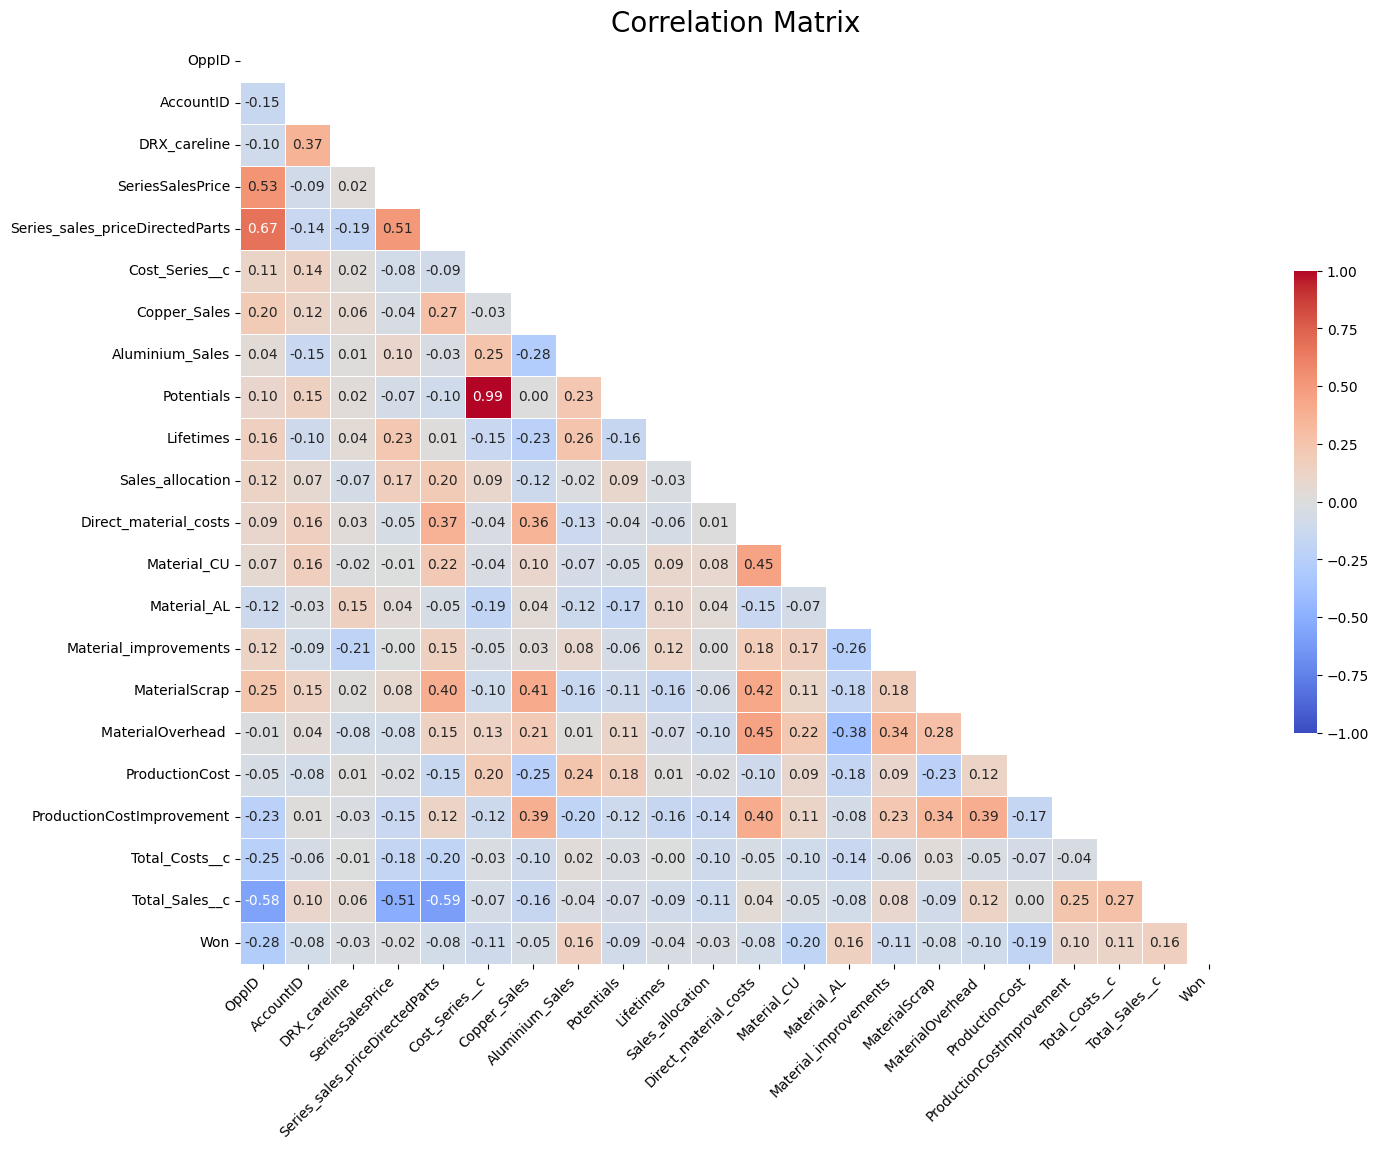

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, linewidths=.5, annot_kws={"size": 10}, cbar_kws={"shrink": .5})

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Title of the heatmap
plt.title('Correlation Matrix', size=20)

# Display the heatmap
plt.show()


In [ ]:
# Check for missing values in the entire dataset
print("Missing values in each column before cleaning:")
print(data.isnull().sum())

# Handle missing values in the target variable 'Won'
data['Won'].fillna(data['Won'].mode()[0], inplace=True)  # Filling with the most frequent value
# Alternatively, you can drop the rows with missing target values
# data.dropna(subset=['Won'], inplace=True)

# Ensure no NaN values remain in 'Won'
print(f"Missing values in 'Won' after cleaning: {data['Won'].isnull().sum()}")

# Check for missing values in feature columns and handle them
# Here, you can either fill or drop NaN values depending on your strategy
data.fillna(data.median(), inplace=True)  # Example: filling NaN values with median of each column

# Confirm no missing values in the entire dataset
print("Missing values in each column after cleaning:")
print(data.isnull().sum())


Missing values in each column before cleaning:
OppID                              0
AccountID                          0
DRX_careline                       0
SeriesSalesPrice                   0
Series_sales_priceDirectedParts    0
Cost_Series__c                     0
Copper_Sales                       0
Aluminium_Sales                    0
Potentials                         0
Lifetimes                          0
Sales_allocation                   0
Direct_material_costs              0
Material_CU                        0
Material_AL                        0
Material_improvements              0
MaterialScrap                      0
MaterialOverhead                   0
ProductionCost                     0
ProductionCostImprovement          0
Total_Costs__c                     0
Total_Sales__c                     0
Won                                2
dtype: int64
Missing values in 'Won' after cleaning: 0
Missing values in each column after cleaning:
OppID                              0
A

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
le = LabelEncoder()
data['OppID'] = le.fit_transform(data['OppID'])
data['AccountID'] = le.fit_transform(data['AccountID'])
data['DRX_careline'] = le.fit_transform(data['DRX_careline'])

# Define features and target
X = data.drop(columns=['Won'])
y = data['Won']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
data['Won']

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
109    0.0
110    0.0
111    0.0
112    0.0
113    0.0
Name: Won, Length: 114, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)
# Calculate log loss
y_pred_proba = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)


Accuracy: 0.6086956521739131
Confusion Matrix:
[[5 4]
 [5 9]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.56      0.53         9
         1.0       0.69      0.64      0.67        14

    accuracy                           0.61        23
   macro avg       0.60      0.60      0.60        23
weighted avg       0.62      0.61      0.61        23

Log Loss: 0.7443686290742193


In [ ]:
data.columns

Index(['OppID', 'AccountID', 'DRX_careline', 'SeriesSalesPrice',
       'Series_sales_priceDirectedParts', 'Cost_Series__c', 'Copper_Sales',
       'Aluminium_Sales', 'Potentials', 'Lifetimes', 'Sales_allocation',
       'Direct_material_costs', 'Material_CU', 'Material_AL',
       'Material_improvements', 'MaterialScrap', 'MaterialOverhead ',
       'ProductionCost', 'ProductionCostImprovement', 'Total_Costs__c',
       'Total_Sales__c', 'Won'],
      dtype='object')

In [ ]:
!pip install streamlit
!pip install pyngrok



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your trained model
model = pickle.load(open('model.pkl', 'rb'))

st.title('Prediction Interface')

# Collect user input
def user_input_features():
    OppID = st.sidebar.number_input('OppID')
    AccountID = st.sidebar.number_input('AccountID')
    DRX_careline = st.sidebar.number_input('DRX_careline')
    SeriesSalesPrice = st.sidebar.number_input('SeriesSalesPrice')
    Series_sales_priceDirectedParts = st.sidebar.number_input('Series_sales_priceDirectedParts')
    Cost_Series__c = st.sidebar.number_input('Cost_Series__c')
    Copper_Sales = st.sidebar.number_input('Copper_Sales')
    Aluminium_Sales = st.sidebar.number_input('Aluminium_Sales')
    Potentials = st.sidebar.number_input('Potentials')
    Lifetimes = st.sidebar.number_input('Lifetimes')
    Sales_allocation = st.sidebar.number_input('Sales_allocation')
    Direct_material_costs = st.sidebar.number_input('Direct_material_costs')
    Material_CU = st.sidebar.number_input('Material_CU')
    Material_AL = st.sidebar.number_input('Material_AL')
    Material_improvements = st.sidebar.number_input('Material_improvements')
    MaterialScrap = st.sidebar.number_input('MaterialScrap')
    MaterialOverhead = st.sidebar.number_input('MaterialOverhead')
    ProductionCost = st.sidebar.number_input('ProductionCost')
    ProductionCostImprovement = st.sidebar.number_input('ProductionCostImprovement')

    data = {
        'OppID': OppID,
        'AccountID': AccountID,
        'DRX_careline': DRX_careline,
        'SeriesSalesPrice': SeriesSalesPrice,
        'Series_sales_priceDirectedParts': Series_sales_priceDirectedParts,
        'Cost_Series__c': Cost_Series__c,
        'Copper_Sales': Copper_Sales,
        'Aluminium_Sales': Aluminium_Sales,
        'Potentials': Potentials,
        'Lifetimes': Lifetimes,
        'Sales_allocation': Sales_allocation,
        'Direct_material_costs': Direct_material_costs,
        'Material_CU': Material_CU,
        'Material_AL': Material_AL,
        'Material_improvements': Material_improvements,
        'MaterialScrap': MaterialScrap,
        'MaterialOverhead': MaterialOverhead,
        'ProductionCost': ProductionCost,
        'ProductionCostImprovement': ProductionCostImprovement
    }

    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Display user input
st.subheader('User Input features')
st.write(input_df)

# Predict using the model
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

st.subheader('Prediction')
st.write('Won' if prediction[0] else 'Lost')

st.subheader('Prediction Probability')
st.write(prediction_proba)


In [ ]:
from pyngrok import ngrok
!streamlit run app.py &

# Create tunnel
public_url = ngrok.connect(port='8501')
public_url





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.68.128.108:8501

